# Data Exploration

## importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import os

## importing data

In [9]:
raw_path = os.path.join(os.path.pardir,'data','raw')
train_file = os.path.join(raw_path,'train.csv')
test_file = os.path.join(raw_path,'test.csv')

In [10]:
train_df = pd.read_csv(train_file,index_col = 'PassengerId')
test_df = pd.read_csv(test_file,index_col = 'PassengerId')

## high-level analysis

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df['Survived']=-4

In [15]:
full_df = pd.concat((test_df,train_df),axis=0)

In [65]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [17]:
full_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-4
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-4
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-4
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-4
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-4


In [18]:
full_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [22]:
m_passengers = full_df.loc[full_df.Sex == 'male',:]
f_passengers = full_df.loc[full_df.Sex == 'female',:]
m_passengers_f_class = full_df.loc[((full_df.Sex == 'male') & (full_df.Pclass ==1)),:]
f_passengers_f_class = full_df.loc[((full_df.Sex == 'male') & (full_df.Pclass ==1)),:]

In [29]:
print('Male passengers:' + str(len(m_passengers)))
print('Female passengers:' + str(len(f_passengers)))
print('Male first class passengers:' + str(len(m_passengers_f_class)))
print('Female first class passengers:' + str(len(f_passengers_f_class)))

Male passengers:843
Female passengers:466
Male first class passengers:179
Female first class passengers:179


## Statistical Analysis

In [31]:
full_df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479,-1.016043
std,0.837836,14.413493,1.041658,0.865560,51.758668,2.083623
min,1.000000,0.170000,0.000000,0.000000,0.000000,-4.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,-4.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [41]:
print('Mean fare: '+ str(full_df.Fare.mean()))
print('Median fare: '+ str(full_df.Fare.median()))
print('Min fare: '+ str(full_df.Fare.min()))
print('Max fare: '+ str(full_df.Fare.max()))
print('Fare range: '+ str(full_df.Fare.max()-full_df.Fare.min()))
print('25 percentile: '+ str(full_df.Fare.quantile(.25)))
print('50 percentile: '+ str(full_df.Fare.quantile(.50)))
print('75 percentile: '+ str(full_df.Fare.quantile(.75)))
print('Variance fare: '+ str(full_df.Fare.var()))
print('Standard deviation fare: '+ str(full_df.Fare.std()))

Mean fare: 33.295479281345585
Median fare: 14.4542
Min fare: 0.0
Max fare: 512.3292
Fare range: 512.3292
25 percentile: 7.8958
50 percentile: 14.4542
75 percentile: 31.275
Variance fare: 2678.959737892895
Standard deviation fare: 51.758668239174156


<AxesSubplot:>

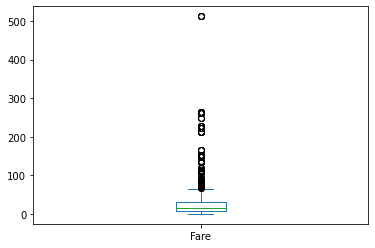

In [42]:
full_df.Fare.plot(kind='box')

In [44]:
full_df.describe(include='all')

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,1309.000000
unique,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,NaN
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,NaN
freq,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,NaN
mean,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,-1.016043
std,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,2.083623
min,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,-4.000000
25%,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,-4.000000
50%,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,1.000000


In [45]:
full_df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [46]:
full_df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [51]:
full_df[full_df.Survived != -4].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [52]:
full_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

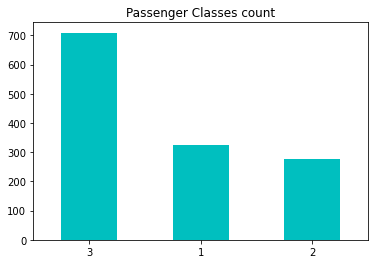

In [62]:
full_df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Passenger Classes count',color='c');

## Distributions

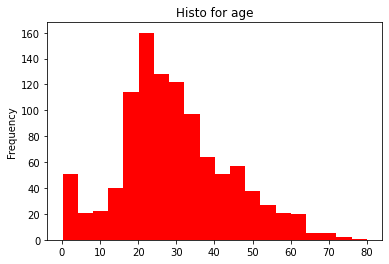

In [68]:
full_df.Age.plot(kind='hist',title='Histo for age',color='r',bins=20);

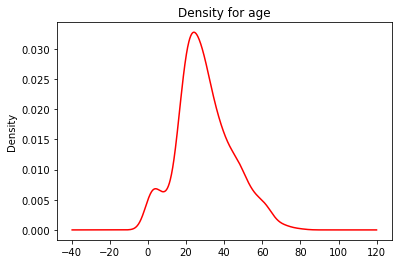

In [70]:
full_df.Age.plot(kind='kde',title='Density for age',color='r');

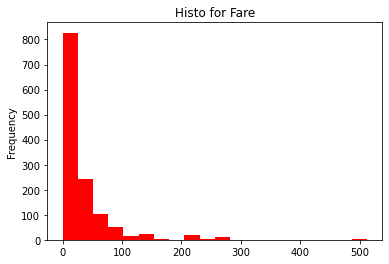

In [71]:
full_df.Fare.plot(kind='hist',title='Histo for Fare',color='r',bins=20);

In [73]:
print('Skewness age: '+ str(full_df.Age.skew()))
print('Skewness Fare: '+ str(full_df.Fare.skew()))

Skewness age: 0.40767455974362266
Skewness Fare: 4.367709134122921


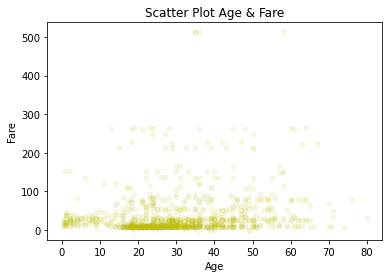

In [76]:
full_df.plot.scatter(x='Age',y='Fare',color='y',title = 'Scatter Plot Age & Fare', alpha=0.1);

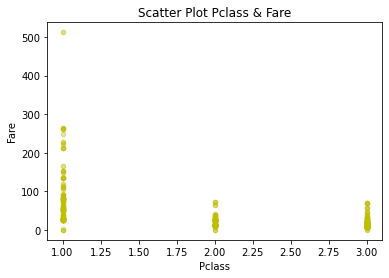

In [78]:
full_df.plot.scatter(x='Pclass',y='Fare',color='y',title = 'Scatter Plot Pclass & Fare', alpha=0.15);

## Grouping & Aggregation

In [79]:
full_df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [80]:
full_df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [83]:
full_df.groupby('Pclass')[['Fare','Age']].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [84]:
full_df.groupby('Pclass').agg({'Fare':'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


## CrossTab

In [89]:
pd.crosstab(full_df.Sex,full_df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


<AxesSubplot:xlabel='Sex'>

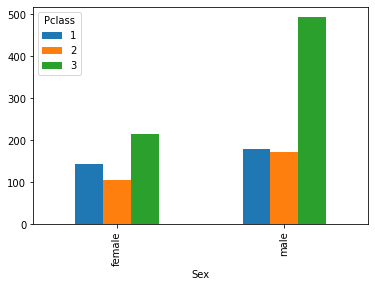

In [90]:
pd.crosstab(full_df.Sex,full_df.Pclass).plot(kind='bar')

## Pivots

In [85]:
full_df.pivot_table(index='Sex',columns='Pclass',values='Age',aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [87]:
full_df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging

In [92]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Survived  1309 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## 1. Embarked Attribute

In [93]:
full_df[full_df.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1


In [95]:
full_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [96]:
pd.crosstab(full_df[full_df.Survived != -4].Survived, full_df[full_df.Survived != -4].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [97]:
full_df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [98]:
full_df.Embarked.fillna('C',inplace=True)

## 2. Fare Attribute

In [100]:
full_df[full_df.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,-4


In [101]:
median_fare = full_df.loc[(full_df.Pclass==3)&(full_df.Embarked == 'S'),'Fare'].median()

In [102]:
median_fare

8.05

In [103]:
full_df.Fare.fillna(median_fare,inplace=True)

## 3. Age Attribute

In [107]:
pd.options.display.max_rows = 20

In [108]:
full_df[full_df.Age.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,-4
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,-4
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,-4
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,-4
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,-4
...,...,...,...,...,...,...,...,...,...,...,...
860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,0
864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,0
869,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,0


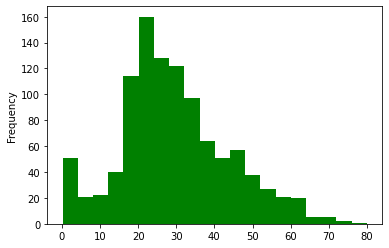

In [110]:
full_df.Age.plot(kind = 'hist',bins = 20, color = 'g');

In [111]:
full_df.Age.mean()

29.881137667304014

In [112]:
full_df.Age.median()

28.0

In [113]:
full_df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

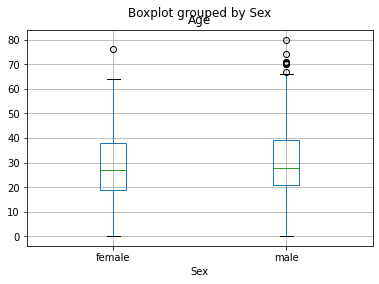

In [114]:
full_df[full_df.Age.notnull()].boxplot('Age','Sex');

In [116]:
full_df.Name

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
887                           Montvila, Rev. Juozas
888                    Graham, Miss. Margaret Edith
889        Johnston, Miss. Catherine Helen "Carrie"
890                           Behr, Mr. Karl Howell
891                             Dooley, Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [126]:
def titleExtractor(name):
    title_group = {
        'mr' : 'Mr',
        'mrs' : 'Mrs',
        'miss' : 'Miss',
        'master' : 'Master',
        'don' : 'Sir',
        'rev' : 'Sir',
        'dr' : 'Officer',
        'mme':'Mrs',
        'ms':'Mrs',
        'major':'Officer',
        'lady':'Lady',
        'sir':'Sir',
        'mlle':'Miss',
        'col':'Officer',
        'capt':'Officer',
        'the countess':'Lady',
        'jonkheer':'Sir',
        'dona':'Lady'
    }
    f_n_title = name.split(',')[1]
    title = f_n_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [129]:
full_df['Title'] = full_df.Name.map(lambda x : titleExtractor(x))

In [130]:
full_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-4,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-4,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-4,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-4,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-4,Mrs


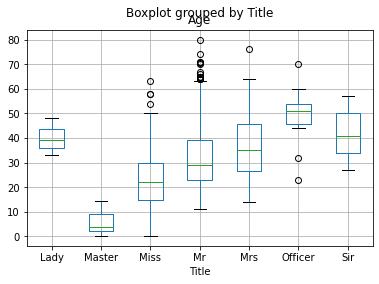

In [132]:
full_df[full_df.Age.notnull()].boxplot('Age','Title');

In [133]:
title_age_median = full_df.groupby('Title').Age.transform('median')
full_df.Age.fillna(title_age_median,inplace = True)

In [135]:
title_age_median

PassengerId
892    29.0
893    35.0
894    29.0
895    29.0
896    35.0
       ... 
887    41.0
888    22.0
889    22.0
890    29.0
891    29.0
Name: Age, Length: 1309, dtype: float64

In [134]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1309 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1309 non-null   object 
 10  Survived  1309 non-null   int64  
 11  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


## Working with outliers

### Age

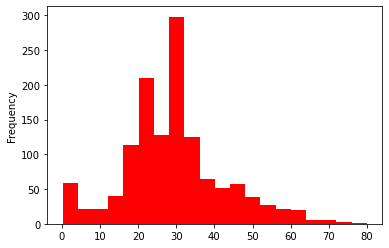

In [144]:
full_df.Age.plot(kind='hist',bins=20,color='r');

In [146]:
full_df.loc[full_df.Age > 70]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,-4,Mrs
97,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0,Mr
117,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,0,Mr
494,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0,Mr
631,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1,Mr
852,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0,Mr


### Fare

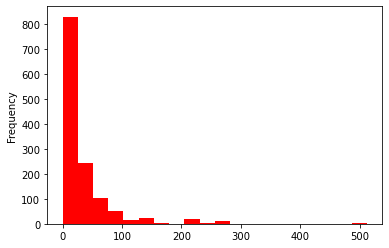

In [147]:
full_df.Fare.plot(kind='hist',bins=20,color='r');

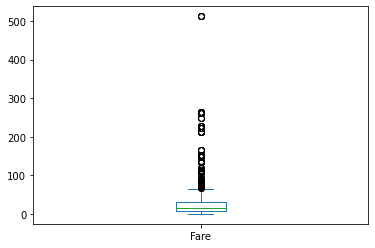

In [148]:
full_df.Fare.plot(kind='box');

In [150]:
full_df.loc[full_df.Fare > 300]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
PassengerId,,,,,,,,,,,,
1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,-4,Mrs
259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1,Miss
680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,Mr
738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,Mr


In [151]:
FareLog = np.log(full_df.Fare + 1)

<AxesSubplot:ylabel='Frequency'>

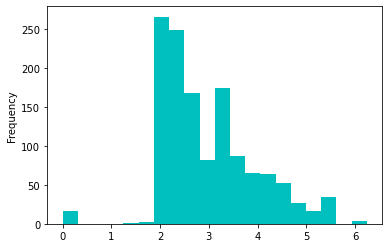

In [152]:
FareLog.plot(kind='hist',color='c',bins=20)

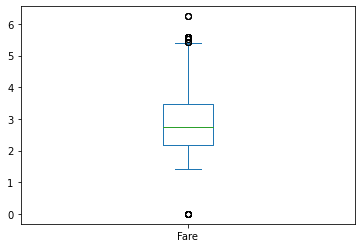

In [153]:
FareLog.plot(kind='box');

In [156]:
pd.qcut(full_df.Fare,4)

PassengerId
892     (-0.001, 7.896]
893     (-0.001, 7.896]
894     (7.896, 14.454]
895     (7.896, 14.454]
896     (7.896, 14.454]
             ...       
887     (7.896, 14.454]
888    (14.454, 31.275]
889    (14.454, 31.275]
890    (14.454, 31.275]
891     (-0.001, 7.896]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [158]:
pd.qcut(full_df.Fare, 4, labels=['very_low','low','high','very_high'])

PassengerId
892    very_low
893    very_low
894         low
895         low
896         low
         ...   
887         low
888        high
889        high
890        high
891    very_low
Name: Fare, Length: 1309, dtype: category
Categories (4, object): ['very_low' < 'low' < 'high' < 'very_high']

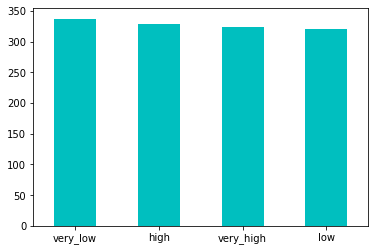

In [160]:
pd.qcut(full_df.Fare,4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',color='c',rot=0);

In [161]:
full_df['Fare_Bin']=pd.qcut(full_df.Fare, 4, labels=['very_low','low','high','very_high'])

In [164]:
full_df.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-4,Mr,very_low
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,-4,Mrs,very_low
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-4,Mr,low
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-4,Mr,low
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,-4,Mrs,low
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,-4,Mr,low
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,-4,Miss,very_low
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,-4,Mr,high
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,-4,Mrs,very_low


## Feature Engineering

### Adult-Child feature

In [167]:
full_df['AgeState']=np.where(full_df['Age']>= 18,'Adult','Child')

In [168]:
full_df['AgeState'].value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [169]:
pd.crosstab(full_df[full_df.Survived != -4].Survived,full_df[full_df.Survived != -4].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63
